### Chapter 2.1  
# Little's Theorem

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

We consider a *system* which can be understood in a very general context. For the system it is only assumed that the limit values considered below are well-defined constants - and not random variables.
The system taken into account can be any selected component of a real system or its model. 
The following parameters are of interest: 
* $\lambda$:   mean arrival rate of the arrival process, which can be of generic nature,
* $E[X]$:   mean number of customers in system,
* $E[T]$:  mean sojourn time of customers in system.

This system assumes it is in statistical equilibrium and the mean number of customers and the mean sojourn time are finite and exist. The so-called Little's theorem applies (or Little's formula, Little's law).

$E[X] = \lambda \cdot E[T]$

## Example: Balking
Consider now a system with customer impatience. A customer arrives and sees the system in state $i$, i.e. there are $i$ other customers in the system. With probability $1-p_i$ the arriving customer refuses to enter the queue e.g. due to too long waiting time. This means this customer balks from the queueing system. With probability $p_i$, the arriving customer joins the systems. This behavior can be observed in practice for example when the waiting line is too long in a supermarket, then some customers decided to not go shopping and do not enter the supermarket.

We assume that the probability that the system is in state $i$ is 
$x(i)=P(X=i) = \binom{N}{i} \cdot \rho^i (1-\rho)^{N-i} $  for  $i = 0, \dots, N$.
In other words: the system state $X$ (r.v.) follows a binomial distribution with parameters $N$ and $\rho$.
$ X \sim \mathrm{BINOM}(N,\rho)$

The probability $p_i$ that a customer joins in state $[X=i]$ is 
$p_i = \frac{1}{i+1}$.
This creates state-dependent arrival rates. The system is in state $i$ with probability $x(i)$. The effective arrival rate $\lambda_i$ of customers entering the system when seeing $i$ other customers is
$\lambda_i = \lambda \cdot p_i $.

Then, the mean arrival rate to the system is

$\bar{\lambda} = \sum_{i=0}^\infty \lambda_i \cdot x(i) = \sum_{i=0}^\infty  \lambda\cdot p_i \cdot x(i) $ .

It is 

$E[X]=\sum_{i=0}^\infty i \cdot x(i)$

and therefore

$E[T] = \frac{E[X]}{\bar{\lambda}} = \frac{\sum_{i=0}^\infty i \cdot x(i)}{\sum_{i=0}^\infty  \lambda\cdot p_i \cdot x(i)} \; $.


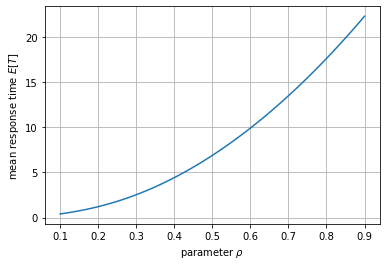

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom 

def get_meanResponseTime(N=10, rho=0.7, lam=4):
    i = np.arange(N+1) # potential system state, i=0,1,...,N
    xi = binom(N,i)*rho**i*(1-rho)**(N-i) # probability that the system is in state i

    pi = 1/(1+i) # probability that customer joins the queue
    lam_i = lam*pi # state-dependent arrival rate

    avg_lam = lam_i@xi # average arrival rate (using scalar product)
    EX = i@xi # average number of customers in system
    ET = EX/avg_lam # average sojourn time
    
    return ET

lam = 4 # parameter for the state-dependent arrival rates
N = 10 # maximum system state 

rhos = np.linspace(0.1,0.9,50) # probability parameter of the binomial distribution
ETs = [get_meanResponseTime(rho = rho, N=N, lam=lam) for rho in rhos]

plt.plot(rhos,ETs)
plt.xlabel('parameter $\\rho$')
plt.ylabel('mean response time $E[T]$')
plt.grid(which='major')